```shell
!wget --no-check-certificate https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip -O ./horse-or-human.zip
```
```shell
!wget --no-check-certificate https://storage.googleapis.com/laurencemoroney-blog.appspot.com/validation-horse-or-human.zip -O ./validation-horse-or-human.zip
```
嘗試將圖片大小縮小，並觀察其效果

In [1]:
import os
import zipfile

local_zip = '../../horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('horse-or-human')
local_zip = '../../validation-horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('validation-horse-or-human')
zip_ref.close()

In [1]:
# Directory with our training horse pictures
train_horse_dir = os.path.join('horse-or-human/horses')

# Directory with our training human pictures
train_human_dir = os.path.join('horse-or-human/humans')

# Directory with our training horse pictures
validation_horse_dir = os.path.join('validation-horse-or-human/horses')

# Directory with our training human pictures
validation_human_dir = os.path.join('validation-horse-or-human/humans')

In [2]:
train_horse_names = os.listdir(train_horse_dir)
print(train_horse_names[:10])

train_human_names = os.listdir(train_human_dir)
print(train_human_names[:10])

validation_horse_hames = os.listdir(validation_horse_dir)
print(validation_horse_hames[:10])

validation_human_names = os.listdir(validation_human_dir)
print(validation_human_names[:10])

['horse01-0.png', 'horse01-1.png', 'horse01-2.png', 'horse01-3.png', 'horse01-4.png', 'horse01-5.png', 'horse01-6.png', 'horse01-7.png', 'horse01-8.png', 'horse01-9.png']
['human01-00.png', 'human01-01.png', 'human01-02.png', 'human01-03.png', 'human01-04.png', 'human01-05.png', 'human01-06.png', 'human01-07.png', 'human01-08.png', 'human01-09.png']
['horse1-000.png', 'horse1-105.png', 'horse1-122.png', 'horse1-127.png', 'horse1-170.png', 'horse1-204.png', 'horse1-224.png', 'horse1-241.png', 'horse1-264.png', 'horse1-276.png']
['valhuman01-00.png', 'valhuman01-01.png', 'valhuman01-02.png', 'valhuman01-03.png', 'valhuman01-04.png', 'valhuman01-05.png', 'valhuman01-06.png', 'valhuman01-07.png', 'valhuman01-08.png', 'valhuman01-09.png']


In [3]:
print('total training horse images:', len(os.listdir(train_horse_dir)))
print('total training human images:', len(os.listdir(train_human_dir)))
print('total validation horse images:', len(os.listdir(validation_horse_dir)))
print('total validation human images:', len(os.listdir(validation_human_dir)))

total training horse images: 500
total training human images: 527
total validation horse images: 128
total validation human images: 128


In [4]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0

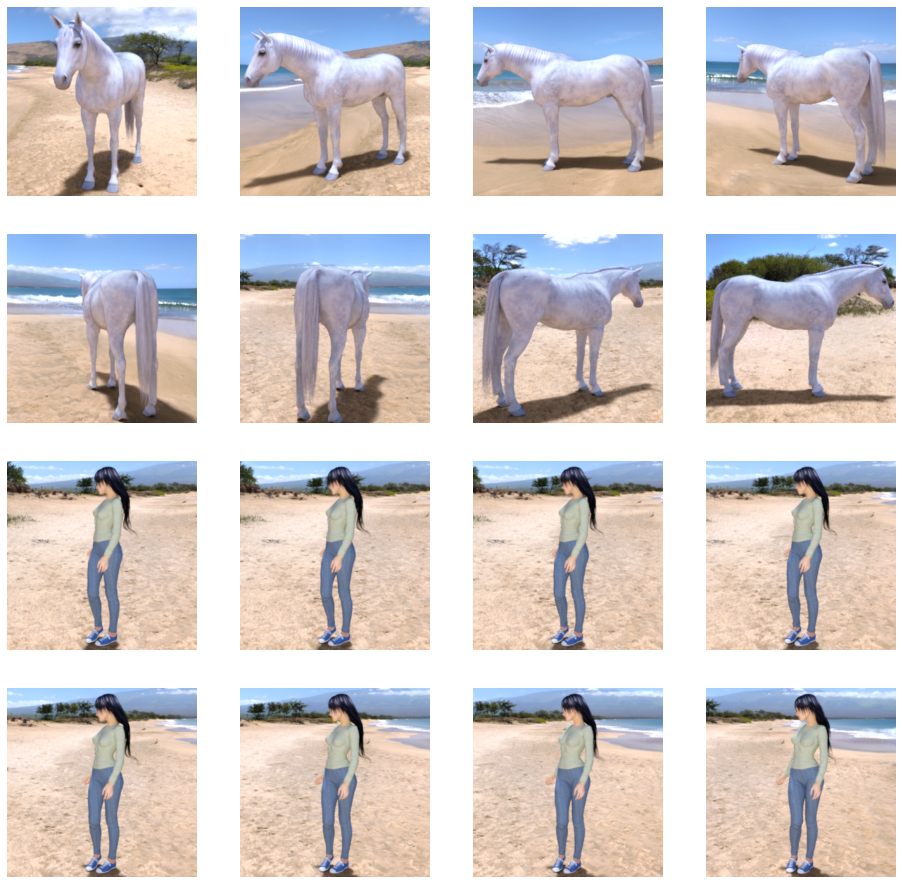

In [5]:
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_horse_pix = [os.path.join(train_horse_dir, fname) 
                for fname in train_horse_names[pic_index-8:pic_index]]
next_human_pix = [os.path.join(train_human_dir, fname) 
                for fname in train_human_names[pic_index-8:pic_index]]

for i, img_path in enumerate(next_horse_pix+next_human_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()


In [6]:
import tensorflow as tf
from tensorflow.keras import layers, Input, Model, activations

In [7]:
visible = Input(shape=(150,150,3)) # 3 表示彩圖(RGB)
conv_2d_one = layers.Conv2D(filters=16, kernel_size=(3,3), activation=activations.relu)(visible) # filters 是隨機值
max_pooling_2d_one = layers.MaxPooling2D(pool_size=(2,2))(conv_2d_one) # MaxPooling2D 表示取最大值
conv_2d_two = layers.Conv2D(filters=32, kernel_size=(3,3), activation=activations.relu)(max_pooling_2d_one)
max_pooling_2d_two = layers.MaxPooling2D(pool_size=(2,2))(conv_2d_two)
conv_2d_three = layers.Conv2D(filters=64, kernel_size=(3,3), activation=activations.relu)(max_pooling_2d_two)
max_pooling_2d_three = layers.MaxPooling2D(pool_size=(2,2))(conv_2d_three)
# conv_2d_four = layers.Conv2D(filters=64, kernel_size=(3,3), activation=activations.relu)(max_pooling_2d_three)
# max_pooling_2d_four = layers.MaxPooling2D(pool_size=(2,2))(conv_2d_four)
# conv_2d_five = layers.Conv2D(filters=64, kernel_size=(3,3), activation=activations.relu)(max_pooling_2d_four)
# max_pooling_2d_five = layers.MaxPooling2D(pool_size=(2,2))(conv_2d_five)
flatten = layers.Flatten()(max_pooling_2d_three)
dense_three = layers.Dense(512, activation=tf.nn.relu)(flatten) 
output = layers.Dense(1, activation=tf.nn.sigmoid)(dense_three)
model = Model(inputs=visible, outputs=output)

In [8]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 64)        0     

In [9]:
model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=0.001), loss='binary_crossentropy', metrics=['accuracy'])

## Data Preprocessing

In [10]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1/255)
validation_datagen = ImageDataGenerator(rescale=1/255)

# Flow training images in batches of 128 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        'horse-or-human/',  # This is the source directory for training images
        target_size=(150, 150),  # All images will be resized to 300x300
        batch_size=128,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

# Flow training images in batches of 128 using train_datagen generator
validation_generator = validation_datagen.flow_from_directory(
        'validation-horse-or-human/',  # This is the source directory for training images
        target_size=(150, 150),  # All images will be resized to 300x300
        batch_size=32,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

Found 1027 images belonging to 2 classes.
Found 256 images belonging to 2 classes.


## Training

In [11]:
history = model.fit(
      train_generator,
      steps_per_epoch=8,  
      epochs=15,
      verbose=1,
      validation_data = validation_generator,
      validation_steps=8)

Epoch 1/15
8/8 [==============================] - 10s 1s/step - loss: 2.8258 - accuracy: 0.4783 - val_loss: 0.5791 - val_accuracy: 0.7617
Epoch 2/15
8/8 [==============================] - 14s 2s/step - loss: 0.5923 - accuracy: 0.7330 - val_loss: 1.5573 - val_accuracy: 0.5938
Epoch 3/15
8/8 [==============================] - 14s 2s/step - loss: 0.2929 - accuracy: 0.8632 - val_loss: 0.6093 - val_accuracy: 0.8867
Epoch 4/15
8/8 [==============================] - 14s 2s/step - loss: 0.3201 - accuracy: 0.8854 - val_loss: 1.0673 - val_accuracy: 0.8086
Epoch 5/15
8/8 [==============================] - 12s 1s/step - loss: 0.1568 - accuracy: 0.9444 - val_loss: 1.2494 - val_accuracy: 0.7969
Epoch 6/15
8/8 [==============================] - 16s 2s/step - loss: 0.2046 - accuracy: 0.9088 - val_loss: 1.0950 - val_accuracy: 0.8125
Epoch 7/15
8/8 [==============================] - 15s 2s/step - loss: 0.1517 - accuracy: 0.9444 - val_loss: 0.2298 - val_accuracy: 0.9336
Epoch 8/15
8/8 [==================

## Running the Model

In [12]:
from tensorflow.keras.preprocessing import image
import glob
import numpy as np
path = 'tmp/'
paths = glob.glob(os.path.join(path, '*.jpg'))
for img_ in paths:
    img = image.load_img(img_, target_size=(150, 150))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)

    images = np.vstack([x])
    classes = model.predict(images, batch_size=10)
    print(classes[0])
    if classes[0]>0.5:
        print(img_ + " is a human")
    else:
        print(img_ + " is a horse")
 

[0.]
tmp\pexels-artem-beliaikin-1122868.jpg is a horse
[0.]
tmp\pexels-dids-2332836.jpg is a horse
[0.]
tmp\pexels-joshua-mcknight-1149368.jpg is a horse
[0.]
tmp\pexels-luidi-cardoso-4221593.jpg is a horse
[0.]
tmp\pexels-misha-voguel-4226183.jpg is a horse
[0.]
tmp\pexels-pixabay-210237.jpg is a horse
[1.]
tmp\pexels-pixabay-459124.jpg is a human
[0.]
tmp\pexels-tatiana-614522.jpg is a horse
[1.]
tmp\pexels-vedran-miletić-2313396.jpg is a human
[0.]
tmp\pexels-zulurid-4141036.jpg is a horse


## Visualizing Intermediate Representations

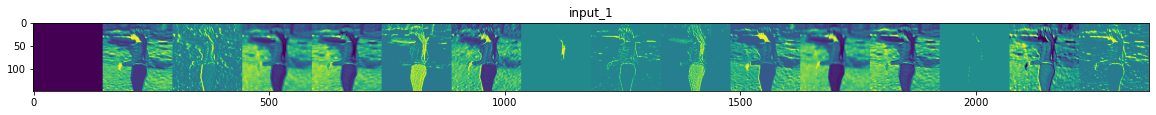

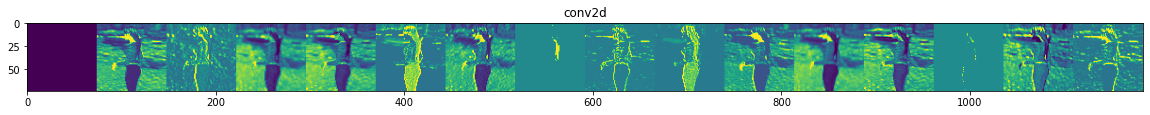

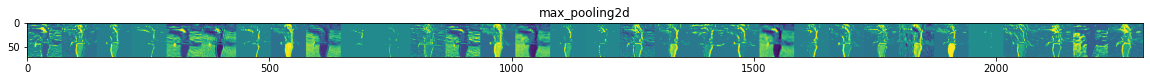

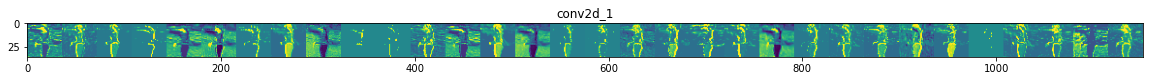

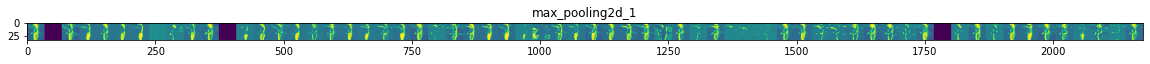

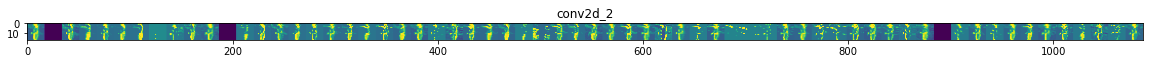

In [14]:
import matplotlib.pyplot as plt
import numpy as np
import random
from tensorflow.keras.preprocessing.image import img_to_array, load_img

# Let's define a new Model that will take an image as input, and will output
# intermediate representations for all layers in the previous model after
# the first.
successive_outputs = [layer.output for layer in model.layers[1:]]
#visualization_model = Model(img_input, successive_outputs)
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)
# Let's prepare a random input image from the training set.
horse_img_files = [os.path.join(train_horse_dir, f) for f in train_horse_names]
human_img_files = [os.path.join(train_human_dir, f) for f in train_human_names]
img_path = random.choice(horse_img_files + human_img_files)

img = load_img(img_path, target_size=(150, 150))  # this is a PIL image
x = img_to_array(img)  # Numpy array with shape (150, 150, 3)
x = x.reshape((1,) + x.shape)  # Numpy array with shape (1, 150, 150, 3)

# Rescale by 1/255
x /= 255

# Let's run our image through our network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)

# These are the names of the layers, so can have them as part of our plot
layer_names = [layer.name for layer in model.layers]

# Now let's display our representations
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  if len(feature_map.shape) == 4:
    # Just do this for the conv / maxpool layers, not the fully-connected layers
    n_features = feature_map.shape[-1]  # number of features in feature map
    # The feature map has shape (1, size, size, n_features)
    size = feature_map.shape[1]
    # We will tile our images in this matrix
    display_grid = np.zeros((size, size * n_features))
    for i in range(n_features):
      # Postprocess the feature to make it visually palatable
      x = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std()
      x *= 64
      x += 128
      x = np.clip(x, 0, 255).astype('uint8')
      # We'll tile each filter into this big horizontal grid
      display_grid[:, i * size : (i + 1) * size] = x
    # Display the grid
    scale = 20. / n_features
    plt.figure(figsize=(scale * n_features, scale))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')